[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/Yquetzal/tnetwork/blob/master/demo_intro.ipynb)

# Quick Start
This is an introduction to the key functionalities of the tnetwork library.
Check documentation for more details

In [1]:
%load_ext autoreload
%autoreload 2

import tnetwork as tn
import networkx as nx
import seaborn as sns

### Creating a dynamic graph

We create a dynamic graph object. Two types exist, using snapshot or interval respresentations. In this example, we use intervals

In [2]:
my_d_graph = tn.DynGraphIG()

We add some nodes and edges. Intervals are inclusive on the left and non inclusive on the right: [start,end[

Note that if we add edges between nodes that are not present (b from 3 to 5), the corresponding node presence is automatically added

In [3]:
my_d_graph.add_node_presence("a",(1,5)) #add node a during interval [1,5[
my_d_graph.add_nodes_presence_from(["a","b","c"],(2,3)) # add ndoes a,b,c from 2 to 3
my_d_graph.add_nodes_presence_from("d",(2,6)) #add node from 2 to 6

my_d_graph.add_interaction("a","b",(2,3)) # link nodes a and b from 2 to 3 
my_d_graph.add_interactions_from(("b","d"),(2,5)) # link nodes b and d from 2 to 5

### Visualizing your graph
We can visualize only nodes using a longitudinal representation

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:2327: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


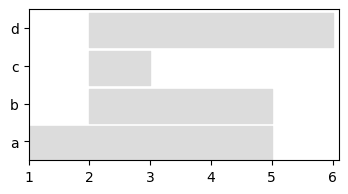

In [4]:
plot = tn.plot_longitudinal(my_d_graph,width=400,height=200)

Or visualize the whole graph at any given time

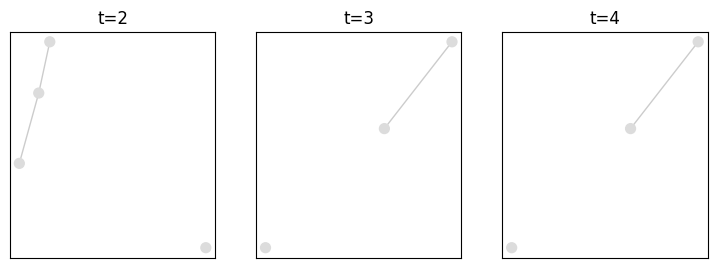

In [5]:
plot = tn.plot_as_graph(my_d_graph,ts=[2,3,4],width=300,height=300)

### Accessing graph information
We can query the graph at a given time and get a networkx object

In [6]:
my_d_graph.graph_at_time(2).nodes()

NodeView(('a', 'b', 'c', 'd'))

We can also query the presence periods of some nodes, for instance. Check documentation for more possibilities.

In [7]:
my_d_graph.node_presence(["a","b"])

{'a': [1,5[ , 'b': [2,5[ }

### Conversion between snapshots<->interval representations
It is possible to transform an interval representation into a snapshot one, and reciprocally. 
We need to specify an aggregation step, i.e., each snapshot of the resulting dynamic graph corresponds to a period of the chosen length.

In [8]:
my_d_graph_SN = my_d_graph.to_DynGraphSN(slices=1)

[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)]


We plot the graph to check that it has not changed (each snapshot has a duration of 1, a continuous horizontal line corresponds to a node present in several adjacent snapshots)

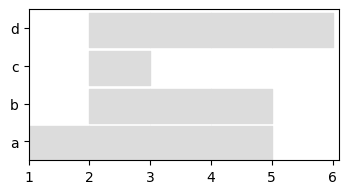

In [9]:
to_plot = tn.plot_longitudinal(my_d_graph_SN,width=400,height=200)

### Slicing, aggregating
We can slice a dynamic network to keep only a chosen period, and re-aggregate it. Note that aggregation can be done according to dates (week, months...) if time values are provided as timestamps (see documentation for details)

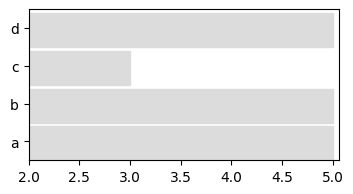

In [10]:
sliced = my_d_graph.slice(2,5)
to_plot = tn.plot_longitudinal(sliced,width=400,height=200)

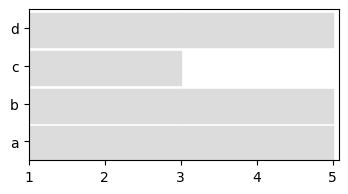

In [11]:
aggregated = my_d_graph_SN.aggregate_sliding_window(bin_size=2)
to_plot = tn.plot_longitudinal(aggregated,width=400,height=200)

## Generate and detect dynamic community structures

One of the key features of tnetwork is to be able to generate networks with community structures, and to detect dynamic communities in networks.

Let's start by generating a random toy model and plotting it with its communities represented as colors

100% (26 of 26) |########################| Elapsed Time: 0:00:00 ETA:  00:00:00

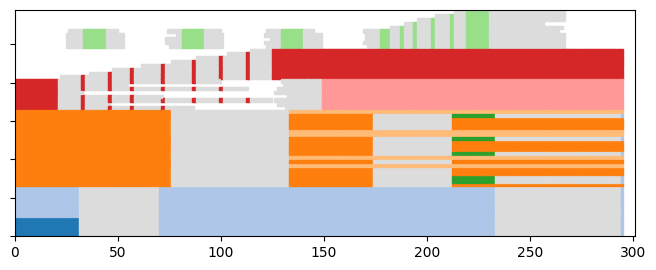

In [19]:
toy_graph,toy_ground_truth = tn.DCD.generate_toy_random_network(alpha=0.9,random_noise=0.05)
plot = tn.plot_longitudinal(toy_graph,toy_ground_truth,height=300)

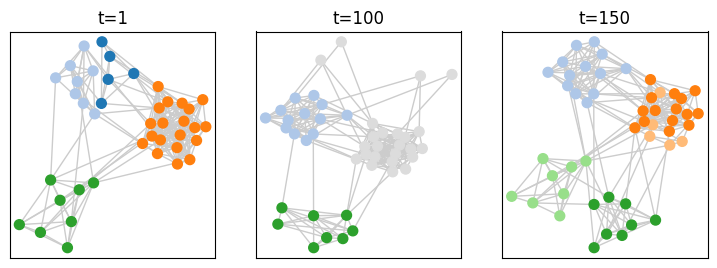

In [20]:
plot = tn.plot_as_graph(toy_graph,toy_ground_truth,ts=[1,100,150],width=300,height=300)

We can then run a dynamic community detection algorithm on the graph. Several methods are available, check the documentation for more details

In [21]:
dynamic_communities = tn.iterative_match(toy_graph)

N/A% (0 of 295) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


100% (295 of 295) |######################| Elapsed Time: 0:00:01 ETA:  00:00:00

Let's check what the communities found look like

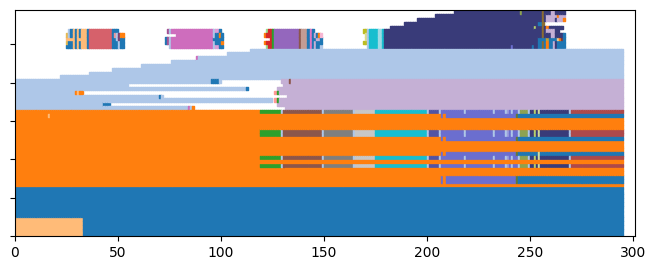

In [22]:
plot = tn.plot_longitudinal(communities=dynamic_communities,height=300)

Finally, we can evaluate the quality of this solution using some quality functions designed for dynamic communities, for instance:

In [23]:
print("longitudinal similarity to ground truth: ",tn.longitudinal_similarity(toy_ground_truth,dynamic_communities))
print("Partition smoothness SM-P: ",tn.SM_P(dynamic_communities))

longitudinal similarity to ground truth:  0.9108283486232346
Partition smoothness SM-P:  0.9318757198549844
